In [328]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dataframe:

### Preço diário do Bitcoin:

In [329]:
path = r'../data/btc.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=',',
)

/tmp/ipykernel_21198/3360293879.py:2: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [330]:
display(df.head())

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Código:

In [331]:
class Bitcoin():
    # Data Understanding: 
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_correlação(self, dataframe, coluna):
        dataframe = pd.DataFrame(
            {
            'Correlação': dataframe.corr()[coluna]
            },
            index=dataframe.columns
        )
        return dataframe
        
    # Data Preparation:
    def removendo_nulos(self, dataframe):
        return dataframe.dropna()
    
    # Data Visualization:
    def gráfico_de_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna], kde=True)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_de_linha_plot(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def gráfico_de_reta_linear(self, dataframe, x, y):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title("Reta de Regressão")
        plt.show()

    # Modelo:
    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[[x]],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'Coeficiente de Determinação (R²): {r2}')

        return treinamento, y_pred, y_test

    def previsão(self, treinamento, entrada):
        y_pred = treinamento.predict(entrada)
        return y_pred


if __name__ == '__main__':
    bitcoin = Bitcoin()

# Output:

## Data Understanding:

### Selecionando as variáveis com a maior correlação com o 'principal_market_price_usd':

In [332]:
corr = bitcoin.verificando_correlação(dataframe=df, coluna='principal_market_price_usd')
colunas = corr[corr['Correlação'] > 0.80]
colunas = colunas.index

In [333]:
print(list(colunas))

['AdrBalUSD100KCnt', 'AdrBalUSD10KCnt', 'AdrBalUSD10MCnt', 'CapAct1yrUSD', 'CapMVRVCur', 'CapMVRVFF', 'CapMrktCurUSD', 'CapMrktEstUSD', 'CapMrktFFUSD', 'IssContUSD', 'IssTotUSD', 'PriceUSD', 'ReferenceRate', 'ReferenceRateEUR', 'ReferenceRateUSD', 'RevHashRateUSD', 'RevHashUSD', 'RevUSD', 'SplyAdrBalUSD100K', 'SplyAdrBalUSD10M', 'SplyMiner0HopAllUSD', 'SplyMiner1HopAllUSD', 'principal_market_price_usd']


### Inciando a análise:

In [334]:
dataset = df[['time', 'PriceUSD', 'principal_market_price_usd', 'CapAct1yrUSD', 'AdrActCnt', 'AdrBal1in100MCnt', 'AdrBal1in10BCnt', 'AdrBal1in1BCnt', 'AdrBalCnt', 'AdrBalNtv0.001Cnt', 'AdrBalNtv0.01Cnt', 'AdrBalNtv0.1Cnt', 'AdrBalUSD100Cnt', 'AdrBalUSD100KCnt', 'AdrBalUSD10Cnt', 'AdrBalUSD10KCnt', 'AdrBalUSD10MCnt', 'AdrBalUSD1Cnt', 'AdrBalUSD1KCnt', 'AdrBalUSD1MCnt', 'DiffLast', 'DiffMean']]
dataset['time'] = pd.to_datetime(
    arg=dataset['time'],
    format='%Y-%m-%d'
)

/tmp/ipykernel_21198/762967401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['time'] = pd.to_datetime(


In [335]:
display(dataset.tail())

,time,PriceUSD,principal_market_price_usd,CapAct1yrUSD,AdrActCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in1BCnt,AdrBalCnt,AdrBalNtv0.001Cnt,...,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,DiffLast,DiffMean
5262,2023-06-01,26825.371345,27223.08,1.654456e+11,919298.0,2966686.0,19771370.0,9153343.0,47836704.0,23487375.0,...,16510018.0,321042.0,28610114.0,1979013.0,5381.0,40061961.0,6977426.0,71286.0,5.123434e+13,5.123434e+13
5263,2023-06-02,27255.227994,26828.42,1.680304e+11,982760.0,2966324.0,19771820.0,9154356.0,47876094.0,23490489.0,...,16594589.0,323659.0,28703940.0,1995026.0,5429.0,40135153.0,7022464.0,71690.0,5.123434e+13,5.123434e+13
5264,2023-06-03,27079.408464,27250.69,1.668006e+11,873884.0,2967305.0,19786368.0,9157574.0,47912202.0,23518042.0,...,16573365.0,322680.0,28689857.0,1989570.0,5410.0,40141535.0,7007471.0,71564.0,5.123434e+13,5.123434e+13
5265,2023-06-04,27158.254570,27077.60,1.668575e+11,879948.0,2965454.0,19744079.0,9150556.0,47853463.0,23451789.0,...,16567932.0,322868.0,28632377.0,1991289.0,5409.0,40080758.0,7010473.0,71612.0,5.123434e+13,5.123434e+13
5266,2023-06-05,NaN,27121.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
bitcoin.verificando_as_dimensões_do_dataframe(dataframe=dataset)

Linhas: 5267 
Colunas: 22


In [337]:
bitcoin.descrição(dataframe=dataset)

,PriceUSD,principal_market_price_usd,CapAct1yrUSD,AdrActCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in1BCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,...,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,DiffLast,DiffMean
count,4705.00,462.00,4.705000e+03,5266.00,5266.00,5266.00,5266.00,5266.00,5266.00,5266.00,...,4705.00,4705.00,4705.00,4705.00,4705.00,4705.00,4705.00,4705.00,5.260000e+03,5.260000e+03
mean,9144.44,25541.36,7.118653e+10,447763.16,1138910.37,6466957.55,3050183.45,15056885.77,7428750.39,3994577.81,...,4766923.50,103468.21,8589239.93,542210.84,1651.22,12369825.52,1881860.52,17918.81,7.008552e+12,7.002985e+12
std,14575.66,7818.99,1.174219e+11,385265.79,931055.98,6532916.71,2873810.56,15376715.58,7649830.19,3849184.90,...,5598094.55,135407.89,9492597.39,701459.90,2648.80,13078496.63,2299713.00,29997.78,1.138815e+13,1.137841e+13
min,0.05,15760.14,5.394211e+04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,90.00,0.00,356.00,0.00,0.00,49369.00,13.00,0.00,1.000000e+00,1.000000e+00
25%,141.01,19943.35,9.039313e+08,35950.25,184139.50,392750.50,316335.50,791388.50,392633.75,318597.00,...,236950.00,1904.00,393802.00,14513.00,3.00,652208.00,102788.00,133.00,2.190866e+06,2.190866e+06
50%,903.20,23145.32,6.265156e+09,461191.00,997696.50,3444501.00,2002125.50,7677896.00,3765858.50,2538424.00,...,1394076.00,12601.00,3088219.00,125246.00,85.00,5686578.00,434050.00,1172.00,1.654968e+11,1.654968e+11
75%,10261.49,28931.06,8.131076e+10,787151.25,2037137.50,12612227.50,5837077.00,27891788.00,14404155.00,7665996.75,...,7702972.00,158918.00,14470463.00,766720.00,1922.00,21379566.00,2857532.00,17212.00,1.287684e+13,1.287684e+13
max,67541.76,47448.43,5.808754e+11,1366494.00,2967305.00,19786368.00,9157574.00,47912202.00,23518042.00,12090331.00,...,17004802.00,541661.00,28745713.00,2545246.00,11076.00,40141535.00,7476670.00,112815.00,5.123434e+13,5.123434e+13


In [338]:
bitcoin.verificando_valores_nulos(dataframe=dataset)

,Quantidade,Porcentagem
time,0,0.00%
PriceUSD,562,10.67%
principal_market_price_usd,4805,91.23%
CapAct1yrUSD,562,10.67%
AdrActCnt,1,0.02%
AdrBal1in100MCnt,1,0.02%
AdrBal1in10BCnt,1,0.02%
AdrBal1in1BCnt,1,0.02%
AdrBalCnt,1,0.02%
AdrBalNtv0.001Cnt,1,0.02%


In [339]:
bitcoin.verificando_valores_duplicados(dataframe=dataset)

,Quantidade,Porcentagem
time,0,0.00%
PriceUSD,584,11.09%
principal_market_price_usd,4804,91.21%
CapAct1yrUSD,561,10.65%
AdrActCnt,317,6.02%
AdrBal1in100MCnt,21,0.40%
AdrBal1in10BCnt,6,0.11%
AdrBal1in1BCnt,13,0.25%
AdrBalCnt,6,0.11%
AdrBalNtv0.001Cnt,7,0.13%


In [340]:
bitcoin.verificando_tipos(dataframe=dataset)

,Tipos
time,datetime64[ns]
PriceUSD,float64
principal_market_price_usd,float64
CapAct1yrUSD,float64
AdrActCnt,float64
AdrBal1in100MCnt,float64
AdrBal1in10BCnt,float64
AdrBal1in1BCnt,float64
AdrBalCnt,float64
AdrBalNtv0.001Cnt,float64


## Data Preparation:

In [341]:
dataset = bitcoin.removendo_nulos(dataframe=dataset)

## Data Visualization:

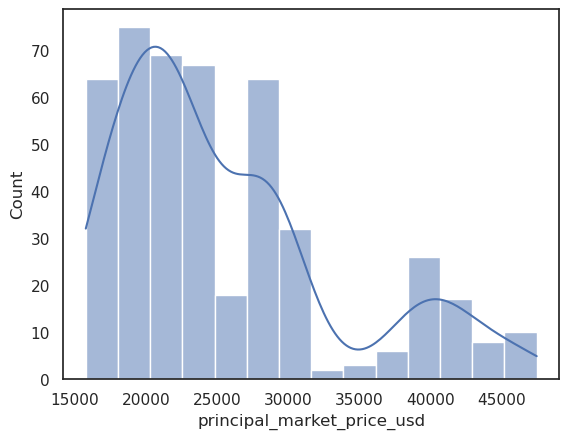

In [342]:
bitcoin.gráfico_de_distribuição(dataframe=dataset, coluna='principal_market_price_usd')

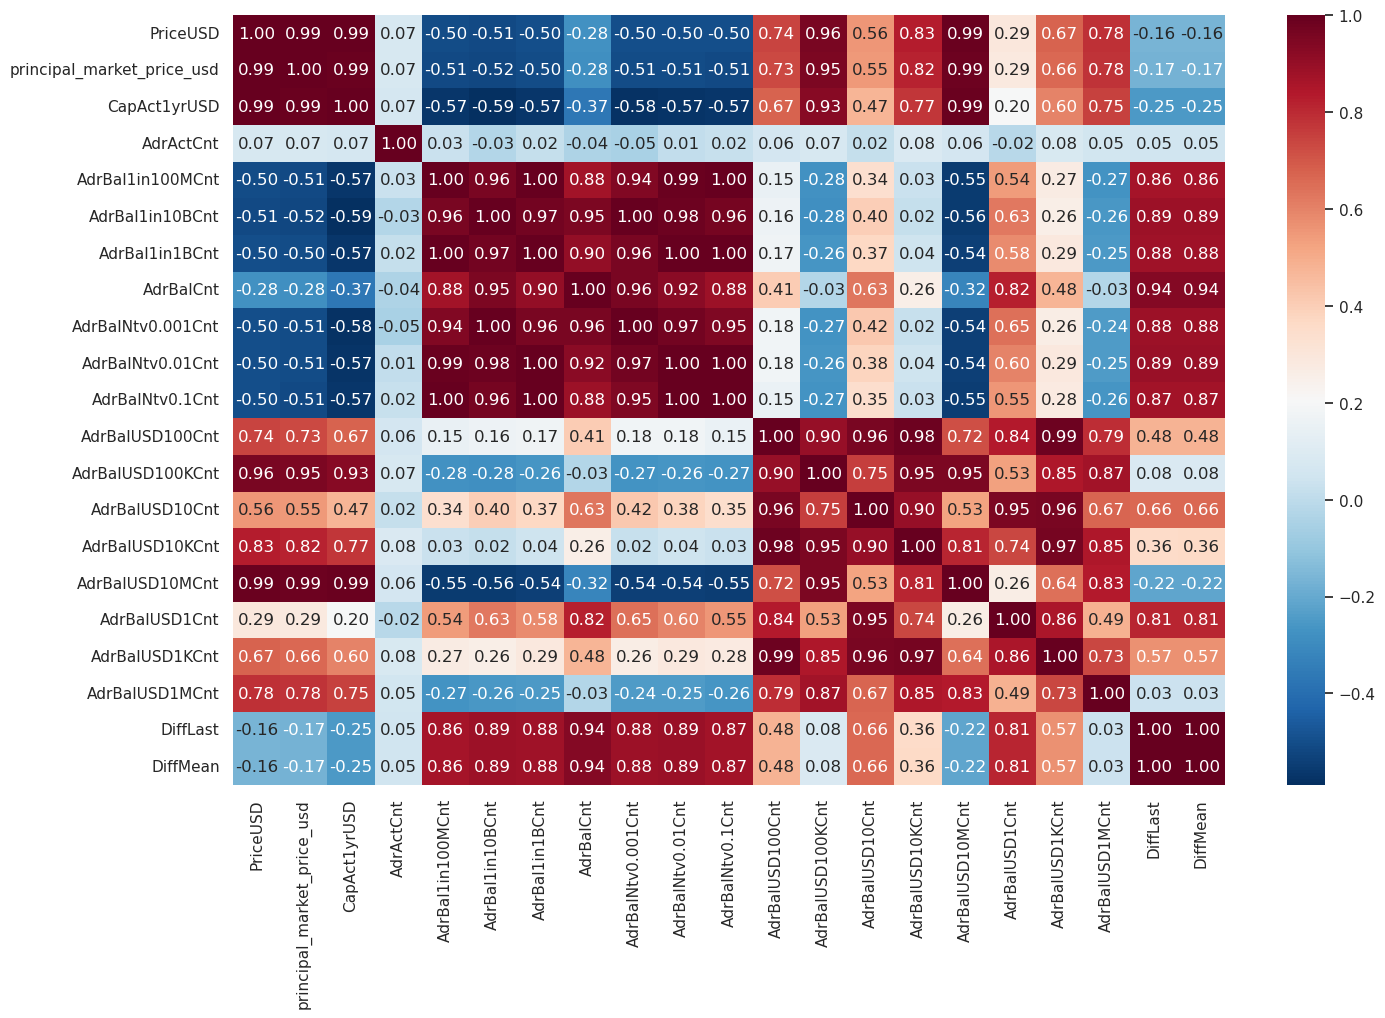

In [343]:
bitcoin.gráfico_de_correlação_heatmap(dataframe=dataset)

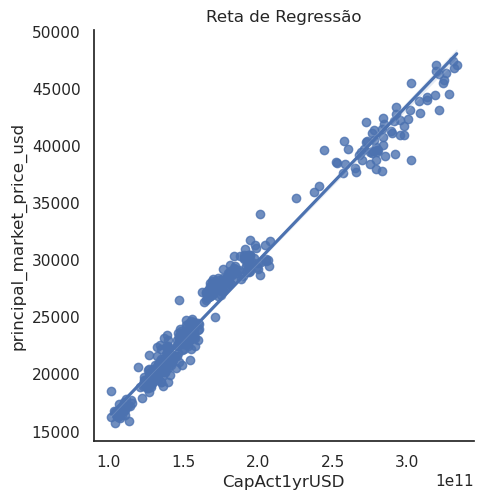

In [344]:
bitcoin.gráfico_de_reta_linear(
    dataframe=dataset,
    x='CapAct1yrUSD',
    y='principal_market_price_usd'
)

## Modelo:

In [345]:
treinamento, y_pred, y_test = bitcoin.treinamento(
    dataframe=dataset,
    x='CapAct1yrUSD',
    y='principal_market_price_usd'
)

Coeficiente de Determinação (R²): 0.9796142449468326


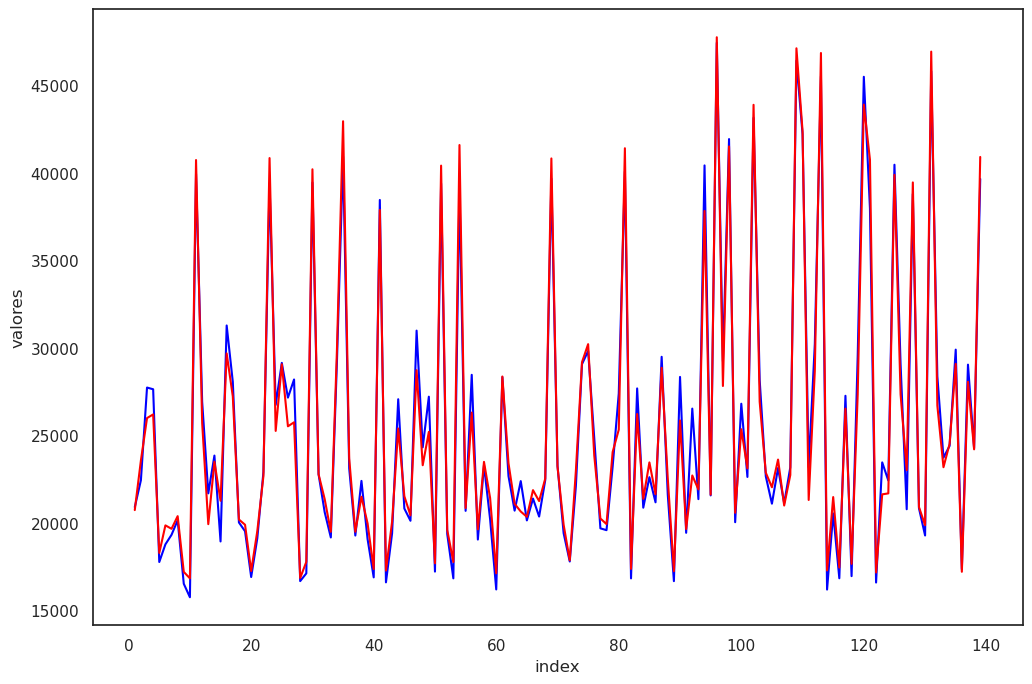

In [347]:
bitcoin.gráfico_de_linha_plot(y_pred=y_pred, y_true=y_test)

In [348]:
dataset['PriceUSD_previsto'] = bitcoin.previsão(
    treinamento=treinamento,
    entrada=dataset[['CapAct1yrUSD']]
)

In [349]:
dataset["residuo"] = dataset["PriceUSD_previsto"] - dataset["principal_market_price_usd"]

In [350]:
display(
    dataset[
        [
            'time',
            'principal_market_price_usd',
            'PriceUSD',
            'PriceUSD_previsto',
            'residuo'
        ]
    ].head()
)

,time,principal_market_price_usd,PriceUSD,PriceUSD_previsto,residuo
4805,2022-03-01,43192.95,44334.457582,46542.921341,3349.971341
4806,2022-03-02,44447.77,43984.584927,46184.716423,1736.946423
4807,2022-03-03,43924.27,42492.774455,44738.019643,813.749643
4808,2022-03-04,42464.40,39106.405216,41354.917297,-1109.482703
4809,2022-03-05,39162.74,39383.884843,41605.803670,2443.063670
